3. (40 points) Using ANN and CNN.

• Read about this tutorial on Tensorflow and examine the provided code for
classifying images of clothing (keras.datasets.fashion mnist) using an ANN.

• How many neurons does the hidden layer have in the given ANN?

• Try different numbers of neurons and report how the results change. Also
try dropout (with different values) and report its impacts on the performance
of the model. You may run the code in google colab and experiment with
different settings there.

• Try to implement a CNN based on the given ANN, by adding two convolution
layers before the fully connected hidden layer and test different settings (e.g.,
number/size of filters). Summarize the experiments you have tried and results
you get.

• Here are some hints about using CNN:
#import Conv2D
from keras.layers import Conv2D
# create a model
model = keras.Sequential()
# add a convolution layer with 32 filters of 3 × 3
model.add(keras.layers.Conv2D(filters=32, kernel size=(3, 3), · · · )
#Include additional parameters, input shape = (28, 28, 1), data format=“channels last”)
in Conv2D().

• Finally, because the images used in this example (fashion mnist) are in gray
scales (of 28 × 28 pixels), the image data needs to be reformatted to be used
as input to the convolution layer, e.g.,
train images = tf.reshape(train images, shape=[-1, 28, 28, 1])

In [1]:
#We will implement the tutorial first and see the results

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
#Load the dataset and split into training and testing part
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#Set the class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Print the shape of training images dataset
train_images.shape


(60000, 28, 28)

In [5]:
#Print the number of labels in the training dataset
len(train_labels)

60000

In [6]:
#Print the labels of the training dataset
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#Print the shape of test images dataset
test_images.shape

(10000, 28, 28)

In [8]:
#Print the number of labels in the test dataset

len(test_labels)


10000

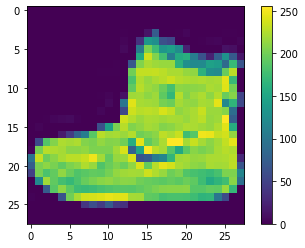

In [9]:
#Perform preprocessing of the dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#Scale the values of pixels to between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

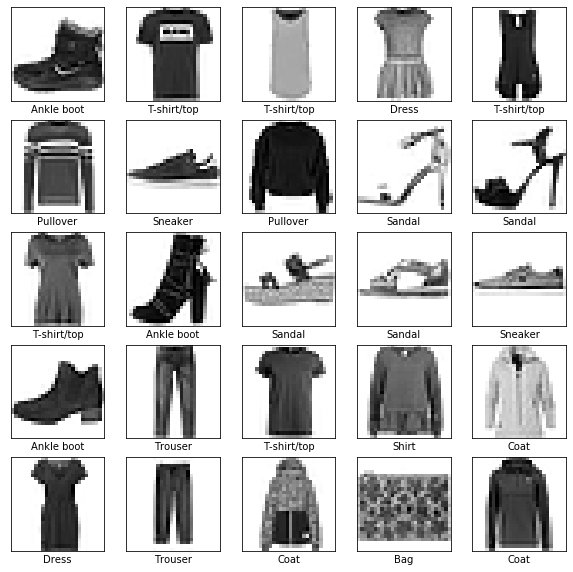

In [12]:
#Display first 25 images of the dataset to check if the dataset is ready for training
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
#We will now set up the layers for the ANN. 

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
#Train the model
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4944 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3743 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2476 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

In [17]:
#Evaluate accuarcy of model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3318 - accuracy: 0.8828

Test accuracy: 0.8827999830245972


In [20]:
#Make predictions. Before that, convert logit values to probabilities using softmax for easier calculations
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
#Make predictions
predictions = probability_model.predict(test_images)


In [23]:
#Print the array of confidence for each class for a single image
predictions[0]


array([1.3223512e-06, 6.6183128e-11, 4.7320402e-08, 3.7670883e-08,
       3.5262861e-08, 4.0443847e-04, 4.5508304e-07, 5.1502712e-02,
       5.6752953e-07, 9.4809037e-01], dtype=float32)

In [24]:
#Find the class with the highest confidence
np.argmax(predictions[0])


9

In [25]:
#Verify if given result is correct or not
test_labels[0]


9

In [27]:
#Plot the results of predictions for first 10 images
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

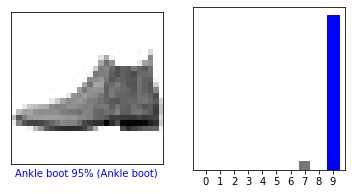

In [28]:
#Verify results
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

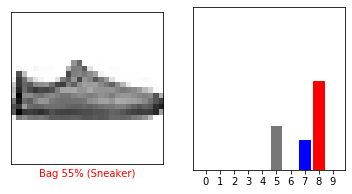

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

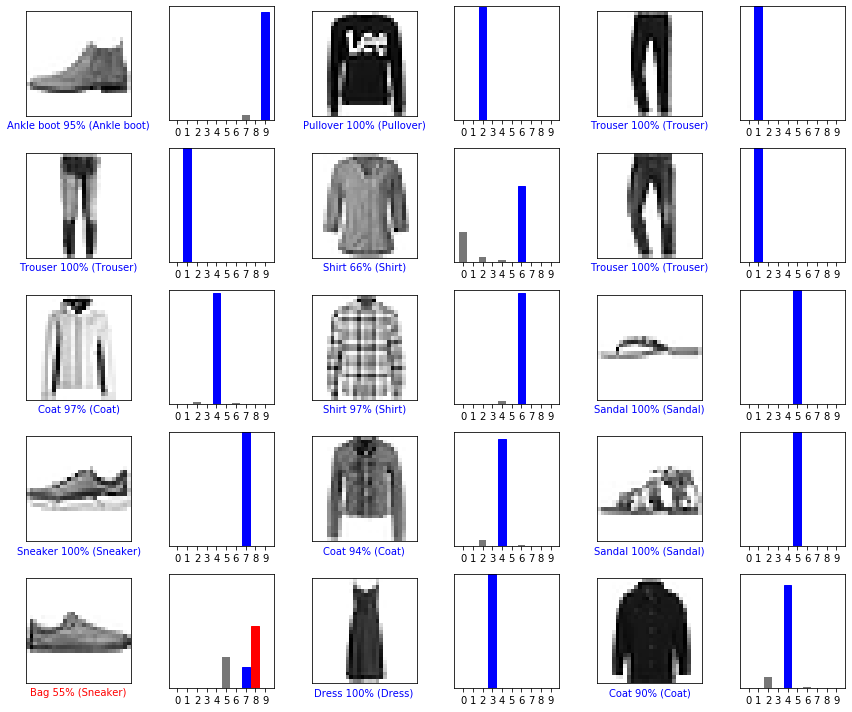

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
#Use the trained model
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
#Predict label for this image
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.5685402e-05 1.4652803e-14 9.9762076e-01 9.2181035e-10 1.8769290e-03
  1.3414909e-11 4.8667283e-04 3.9673660e-17 4.6024787e-10 3.0338679e-12]]


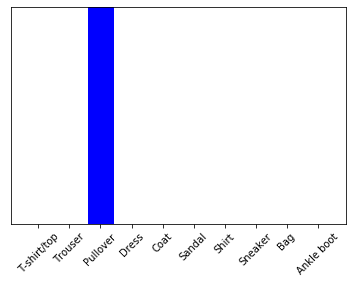

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [36]:
np.argmax(predictions_single[0])


2

Observations:

**1. The number of neurons in the hidden layer have for the given ANN is 128.**

**2. The results of experiments with trying different number of neurons and dropout rates are in subsequent notebooks**

**3. For the self designed CNN, will do the following experiments: change number of filters and size of filters.**